# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Achmad Zahir Wajdi]
- **Email:** [adyarekla@gmail.com]
- **ID Dicoding:** [achmad_zahir_Z7VA]

## Menentukan Pertanyaan Bisnis

1. Bagaimana pengaruh waktu (jam dan bulan) terhadap tren penggunaan sepeda?
2. Apa dampak hari libur terhadap tingkat penggunaan sepeda dibandingkan dengan hari biasa?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data

saya memilih **Bike Sharing Dataset**, sehingga pada bagian ini saya akan mengimport file **day.csv** dan **hour.csv**

In [2]:
day_df = pd.read_csv("dataset\day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("dataset\hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insigth :**
- **day.csv** : dataset ini berisi data harian dari tahun 2011 hingga 2012
- **hour.csv** : dataset ini berisi data per jam dari tahun 2011 hingga 2012

### Assessing Data

#### Assessing day_df

Melihat semua deskripsi

In [4]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


Melihat informasi column yang ada dan melihat apakah terdapat null value

In [5]:
day_df.info(), day_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


(None,
 instant       0
 dteday        0
 season        0
 yr            0
 mnth          0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64)

Apakah terdapat nilai duplikasi?

In [6]:
print("Jumlah duplikasi data: ", day_df.duplicated().sum())

Jumlah duplikasi data:  0


#### Assessing hour_df

Melihat semua deskripsi

In [7]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


Melihat informasi column yang ada dan melihat apakah terdapat null value

In [8]:
hour_df.info(), hour_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


(None,
 instant       0
 dteday        0
 season        0
 yr            0
 mnth          0
 hr            0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64)

Apakah terdapat nilai duplikasi?

In [9]:
print("Jumlah duplikasi data: ", hour_df.duplicated().sum())

Jumlah duplikasi data:  0


**Insight:**
- Tipe data pada kolom dteday dari kedua dataset belum sesuai, seharunya kolom tersebut bertipe data datetime
- Kedua dataset tersebut tidak terdapat duplikasi dan tidak memiliki null value

### Cleaning Data

1. Melakukan drop day.csv
karena:

Pertanyaan 1: Pengaruh waktu (jam dan bulan) terhadap tren penggunaan sepeda memerlukan data per jam, yang tersedia di hour.csv. Data ini mencakup penggunaan sepeda setiap jam, yang memungkinkan kita melihat pola penggunaan berdasarkan waktu.

Pertanyaan 2: Dampak hari libur terhadap penggunaan sepeda juga dapat dijawab dengan hour.csv, karena file ini mencakup informasi tentang hari libur (holiday=1) dan penggunaan sepeda setiap jam. Kita dapat menganalisis apakah ada perbedaan penggunaan antara hari libur dan hari kerja.

In [10]:
del day_df

2. Melakukan drop columns yang tidak diperlukan, dibawah ini merupakan columns yang diperlukan untuk dianalisa.

- yr: Untuk mengidentifikasi tahun (2011 atau 2012).
- mnth: Untuk analisis tren bulanan.
- hr: Untuk analisis tren berdasarkan jam.
- holiday: Untuk membandingkan penggunaan pada hari libur.
- workingday: Untuk mengetahui hari kerja.
- cnt: Jumlah total penggunaan sepeda (kolom target untuk analisis penggunaan).
- casual dan registered: Berguna jika Anda ingin menganalisis pengguna kasual dan terdaftar secara terpisah.

In [11]:
columns_to_drop = ['instant', 'dteday', 'season', 'weekday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
hour_df_cleaned = hour_df.drop(columns=columns_to_drop)

hour_df_cleaned.head()

,yr,mnth,hr,holiday,workingday,casual,registered,cnt
0,0,1,0,0,0,3,13,16
1,0,1,1,0,0,8,32,40
2,0,1,2,0,0,5,27,32
3,0,1,3,0,0,3,10,13
4,0,1,4,0,0,0,1,1


In [12]:
hour_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   yr          17379 non-null  int64
 1   mnth        17379 non-null  int64
 2   hr          17379 non-null  int64
 3   holiday     17379 non-null  int64
 4   workingday  17379 non-null  int64
 5   casual      17379 non-null  int64
 6   registered  17379 non-null  int64
 7   cnt         17379 non-null  int64
dtypes: int64(8)
memory usage: 1.1 MB


## Exploratory Data Analysis (EDA)

#### 1. Analisis tren penggunaan sepeda berdasarkan jam dan bulan

Agregasi rata-rata penggunaan sepeda (cnt) berdasarkan jam dan bulan

In [13]:
hourly_usage = hour_df_cleaned.groupby('hr')['cnt'].mean()
hourly_usage

hr
0      53.898072
1      33.375691
2      22.869930
3      11.727403
4       6.352941
5      19.889819
6      76.044138
7     212.064649
8     359.011004
9     219.309491
10    173.668501
11    208.143054
12    253.315934
13    253.661180
14    240.949246
15    251.233196
16    311.983562
17    461.452055
18    425.510989
19    311.523352
20    226.030220
21    172.314560
22    131.335165
23     87.831044
Name: cnt, dtype: float64

In [14]:
monthly_usage = hour_df_cleaned.groupby('mnth')['cnt'].mean()
monthly_usage

mnth
1      94.424773
2     112.865026
3     155.410726
4     187.260960
5     222.907258
6     240.515278
7     231.819892
8     238.097627
9     240.773138
10    222.158511
11    177.335421
12    142.303439
Name: cnt, dtype: float64

**Insight :**

- Penggunaan sepeda cenderung rendah di bulan-bulan musim dingin seperti Januari (94.42), Februari (112.87), dan meningkat di musim panas seperti Juni (240.52), Juli (231.82), dan Agustus (238.10).

- Penggunaan sepeda meningkat selama bulan-bulan hangat (musim panas), dan menurun selama musim dingin, kemungkinan karena cuaca yang lebih mendukung aktivitas luar ruangan selama musim panas.

#### 2. Analisis perbandingan penggunaan sepeda pada hari libur vs hari biasa

Agregasi rata-rata penggunaan sepeda (cnt) berdasarkan hari libur dan hari kerja

In [15]:
holiday_usage = hour_df_cleaned.groupby('holiday')['cnt'].mean()
holiday_usage

holiday
0    190.42858
1    156.87000
Name: cnt, dtype: float64

**Insight :**
- Rata-rata penggunaan sepeda pada hari kerja (holiday = 0) adalah 190.43, sedangkan pada hari libur (holiday = 1) adalah 156.87.
- Penggunaan sepeda lebih tinggi pada hari kerja dibandingkan hari libur. Ini menunjukkan bahwa sepeda sering digunakan untuk keperluan perjalanan harian, seperti perjalanan ke kantor atau sekolah, terutama oleh pengguna terdaftar.


#### 3. Korelasi antara penggunaan sepeda dengan jam, bulan, dan hari libur

In [16]:
correlation_matrix = hour_df_cleaned[['hr', 'mnth', 'holiday', 'cnt']].corr()
correlation_matrix
# Menghitung korelasi antara variabel numerik dengan 'cnt' (jumlah penggunaan sepeda)


,hr,mnth,holiday,cnt
hr,1.000000,-0.005772,0.000479,0.394071
mnth,-0.005772,1.000000,0.018430,0.120638
holiday,0.000479,0.018430,1.000000,-0.030927
cnt,0.394071,0.120638,-0.030927,1.000000


**Insight:**
- Korelasi antara Jam (hr) dan Jumlah Penggunaan Sepeda (cnt): Nilai korelasinya adalah 0.394. Ini menunjukkan korelasi positif sedang antara jam dan penggunaan sepeda. Artinya, waktu (jam) memiliki pengaruh yang cukup signifikan terhadap penggunaan sepeda, dengan puncaknya kemungkinan besar terjadi di waktu-waktu tertentu (seperti yang terlihat dari visualisasi).
- Korelasi antara Bulan (mnth) dan Jumlah Penggunaan Sepeda (cnt): Nilai korelasinya adalah 0.121. Ini menunjukkan hubungan yang lemah namun positif. Artinya, meskipun ada beberapa variasi penggunaan sepeda sepanjang tahun, pengaruh bulan terhadap jumlah penggunaan sepeda tidak terlalu kuat.
- Korelasi antara Hari Libur (holiday) dan Jumlah Penggunaan Sepeda (cnt): Nilai korelasinya adalah -0.031. Ini menunjukkan bahwa tidak ada hubungan yang signifikan antara hari libur dan jumlah penggunaan sepeda. Dengan korelasi yang sangat rendah dan negatif, hari libur tidak terlalu memengaruhi jumlah pengguna sepeda, meskipun ada sedikit penurunan pada hari libur seperti yang ditunjukkan dalam visualisasi boxplot.



## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh waktu (jam dan bulan) terhadap tren penggunaan sepeda?


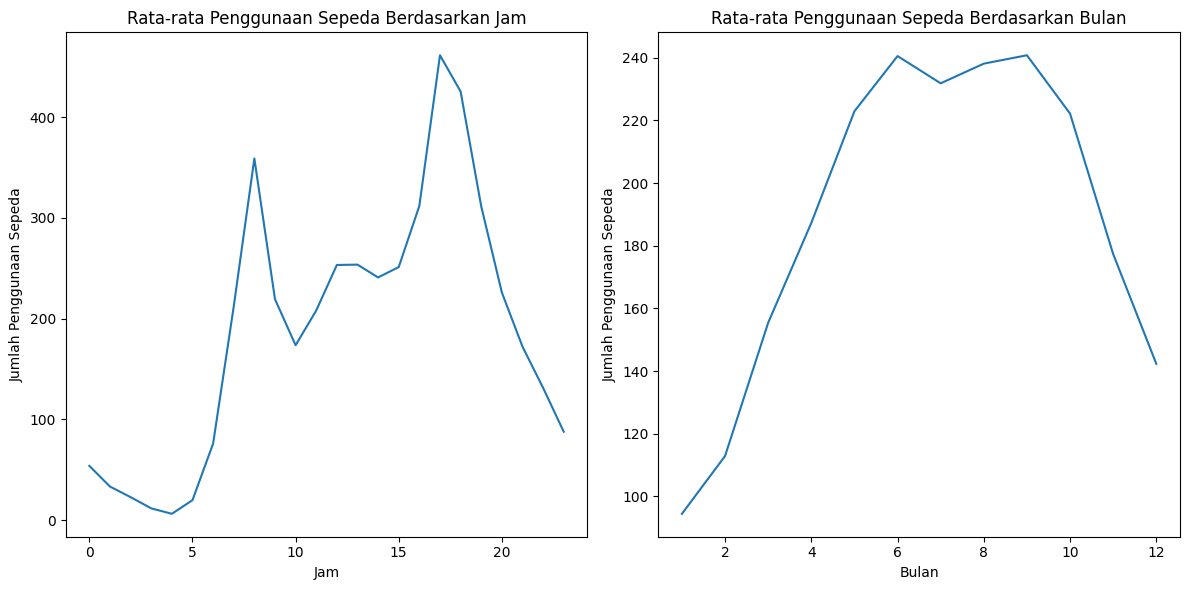

In [17]:
plt.figure(figsize=(12, 6))

# Line plot untuk tren penggunaan sepeda berdasarkan jam
plt.subplot(1, 2, 1)
sns.lineplot(x=hourly_usage.index, y=hourly_usage.values)
plt.title('Rata-rata Penggunaan Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penggunaan Sepeda')

# Line plot untuk tren penggunaan sepeda berdasarkan bulan
plt.subplot(1, 2, 2)
sns.lineplot(x=monthly_usage.index, y=monthly_usage.values)
plt.title('Rata-rata Penggunaan Sepeda Berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penggunaan Sepeda')

plt.tight_layout()
plt.show()

**Insight:**
- Tren Berdasarkan Jam: Dari visualisasi pertama, kita dapat melihat bahwa penggunaan sepeda menunjukkan puncaknya di dua waktu utama: pagi hari (sekitar pukul 8) dan sore hari (sekitar pukul 17). Ini mengindikasikan penggunaan sepeda yang tinggi selama jam sibuk, kemungkinan besar terkait dengan perjalanan ke dan dari tempat kerja.
- Tren Berdasarkan Bulan: Dari visualisasi kedua, terlihat peningkatan penggunaan sepeda pada musim panas (bulan 6 hingga 8), dan penurunan penggunaan pada musim dingin. Ini mengindikasikan bahwa cuaca hangat mempengaruhi peningkatan aktivitas bersepeda.

### Pertanyaan 2: Apa dampak hari libur terhadap tingkat penggunaan sepeda dibandingkan dengan hari biasa?

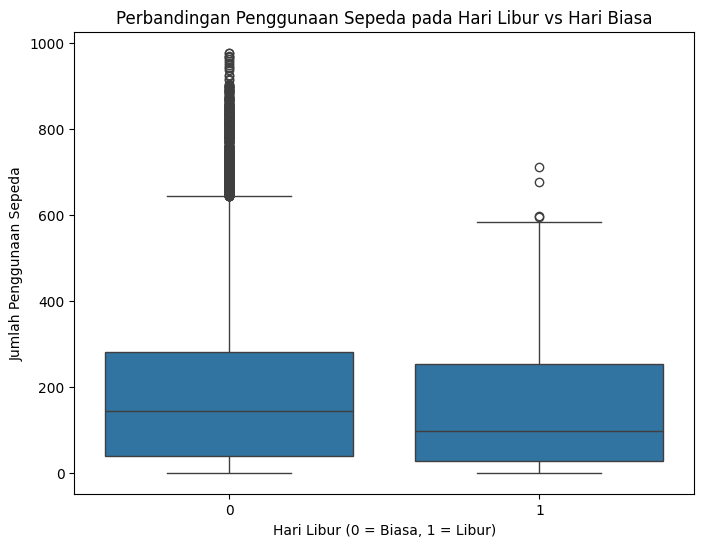

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='holiday', y='cnt', data=hour_df_cleaned)
plt.title('Perbandingan Penggunaan Sepeda pada Hari Libur vs Hari Biasa')
plt.xlabel('Hari Libur (0 = Biasa, 1 = Libur)')
plt.ylabel('Jumlah Penggunaan Sepeda')

plt.show()

**Insight:**
- Perbandingan Hari Libur dan Hari Biasa: Dari boxplot, terlihat bahwa penggunaan sepeda pada hari biasa cenderung lebih tinggi dibandingkan hari libur. Ini menunjukkan bahwa pengguna terdaftar (mungkin pekerja) lebih aktif menggunakan sepeda pada hari kerja. Namun, distribusi penggunaan pada hari libur juga menunjukkan adanya aktivitas yang cukup signifikan, mungkin dari pengguna kasual.

## Analisis Lanjutan (Clustering)

#### Binning jam ke dalam kategori waktu (0-5: malam, 6-11: pagi, 12-17: siang, 18-23: sore)


Pengelompokan Berdasarkan Jam (hr): Kita dapat membagi jam menjadi beberapa kelompok (misalnya, malam, pagi, siang, sore) dan menghitung rata-rata penggunaan sepeda di setiap kelompok. Ini akan membantu kita memahami tren penggunaan sepeda berdasarkan waktu dalam sehari.

In [19]:
hour_df_cleaned['time_of_day'] = pd.cut(hour_df_cleaned['hr'],
                                        bins=[0, 5, 11, 17, 23],
                                        labels=['Malam', 'Pagi', 'Siang', 'Sore'],
                                        right=False)

hour_df_cleaned.head()

,yr,mnth,hr,holiday,workingday,casual,registered,cnt,time_of_day
0,0,1,0,0,0,3,13,16,Malam
1,0,1,1,0,0,8,32,40,Malam
2,0,1,2,0,0,5,27,32,Malam
3,0,1,3,0,0,3,10,13,Malam
4,0,1,4,0,0,0,1,1,Malam


In [20]:
time_of_day_usage = hour_df_cleaned.groupby('time_of_day')['cnt'].mean()
time_of_day_usage

C:\Users\HP\AppData\Local\Temp\ipykernel_4632\1874931226.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_of_day_usage = hour_df_cleaned.groupby('time_of_day')['cnt'].mean()


time_of_day
Malam     25.919640
Pagi     177.071264
Siang    253.248399
Sore     288.107094
Name: cnt, dtype: float64

**Insight:**
Pengelompokan Berdasarkan Jam (hr):

- Malam (0-5): Rata-rata penggunaan sepeda adalah 25.9.
- Pagi (6-11): Rata-rata penggunaan sepeda adalah 177.1.
- Siang (12-17): Rata-rata penggunaan sepeda meningkat menjadi 253.2.
- Sore (18-23): Penggunaan sepeda paling tinggi di 288.1.

Penggunaan sepeda paling tinggi terjadi di sore hari, diikuti oleh siang dan pagi hari. Penggunaan sepeda paling rendah terjadi pada malam hari.

## Conclusion

Pertanyaan 1: Bagaimana pengaruh waktu (jam dan bulan) terhadap tren penggunaan sepeda?

1. Pengaruh Jam Terhadap Penggunaan Sepeda:

  - Penggunaan sepeda memiliki pola yang jelas sepanjang hari. Penggunaan tertinggi terjadi pada sore hari (18-23) dengan rata-rata penggunaan sebesar 288 sepeda, diikuti oleh siang (12-17) dengan rata-rata penggunaan 253 sepeda. Ini menunjukkan bahwa sore dan siang hari, terutama saat orang pulang dari kerja atau beraktivitas di luar ruangan, merupakan waktu puncak penggunaan sepeda.
  - Pagi hari (6-11) juga menunjukkan peningkatan signifikan, terutama selama jam sibuk pagi, dengan rata-rata 177 sepeda.
  - Penggunaan paling rendah terjadi di malam hari (0-5), hanya dengan rata-rata 25 sepeda, menunjukkan bahwa sepeda lebih jarang digunakan pada malam hari.
2. Pengaruh Bulan Terhadap Penggunaan Sepeda:

  - Penggunaan sepeda mengalami fluktuasi musiman, dengan puncak terjadi selama musim panas, khususnya pada bulan September (240) dan Juni (240), yang merupakan bulan dengan cuaca terbaik untuk aktivitas luar ruangan.
  - Penggunaan sepeda terendah terjadi pada bulan Januari (94) dan Desember (142), yang mungkin disebabkan oleh cuaca dingin yang kurang mendukung aktivitas bersepeda.

Kesimpulan Utama: Waktu memiliki pengaruh besar terhadap tren penggunaan sepeda. Puncak penggunaan terjadi pada sore hari dan selama bulan-bulan musim panas, sedangkan penggunaan paling rendah terjadi pada malam hari dan bulan-bulan musim dingin. Hal ini dapat menjadi dasar bagi perencanaan alokasi sepeda di waktu dan bulan tertentu.

Pertanyaan 2: Apa dampak hari libur terhadap tingkat penggunaan sepeda dibandingkan dengan hari biasa?
1. Penggunaan pada Hari Libur vs. Hari Biasa:

  - Penggunaan sepeda lebih tinggi pada hari biasa (190 sepeda) dibandingkan hari libur (157 sepeda). Hal ini menunjukkan bahwa sepeda cenderung lebih sering digunakan untuk keperluan sehari-hari seperti transportasi kerja atau aktivitas rutin pada hari biasa, sedangkan pada hari libur penggunaannya cenderung menurun.
2. Penggunaan pada Hari Kerja vs. Non-Kerja:

  - Data menunjukkan bahwa sepeda lebih banyak digunakan pada hari kerja (193 sepeda) dibandingkan hari non-kerja (181 sepeda). Ini semakin memperkuat bahwa penggunaan sepeda lebih terkait dengan aktivitas transportasi rutin daripada rekreasi, meskipun perbedaannya tidak terlalu signifikan antara hari kerja dan non-kerja.

Kesimpulan Utama: Hari libur cenderung mengurangi penggunaan sepeda dibandingkan hari biasa, sementara perbedaan antara hari kerja dan non-kerja tidak terlalu signifikan. Ini menunjukkan bahwa sepeda lebih sering digunakan untuk aktivitas sehari-hari pada hari-hari kerja biasa, terutama oleh pengguna terdaftar.